In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

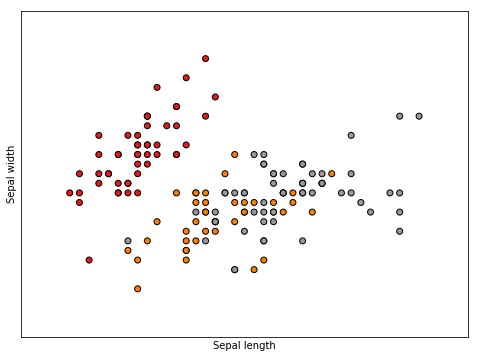

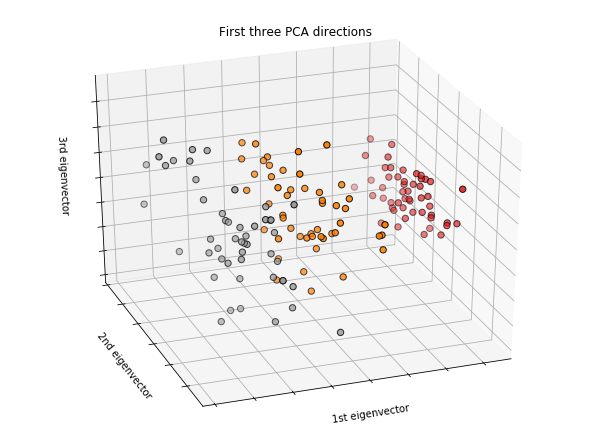

In [101]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [0]:
X=iris.data

In [0]:
import torch.nn.functional as F 

In [0]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.fc1=nn.Linear(4,200)
    self.fc2=nn.Linear(200,24)
    self.fc3=nn.Linear(24,1)
  def forward(self,x):
    h1 =F.relu(self.fc1(x))
    h2 =F.relu(self.fc2(h1))
    h3 =self.fc3(h2)
    return h3

In [105]:
network=Net()
network

Net(
  (fc1): Linear(in_features=4, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=24, bias=True)
  (fc3): Linear(in_features=24, out_features=1, bias=True)
)

In [0]:
loss_fn=torch.nn.MSELoss(reduction='mean')
optimizer=torch.optim.SGD(network.parameters(),lr=1e-4)

In [0]:

X=X.astype('float64')
y=y.astype('float64')
X=torch.from_numpy(X)
y=torch.from_numpy(y)


In [0]:

X=X.float()
y=y.float()
ls=[]

In [113]:
for x in range(5000):
  y_pred=network(X)
  loss=loss_fn(y_pred,y)
  ls.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:443: UserWarning: Using a target size (torch.Size([150])) that is different to the input size (torch.Size([150, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


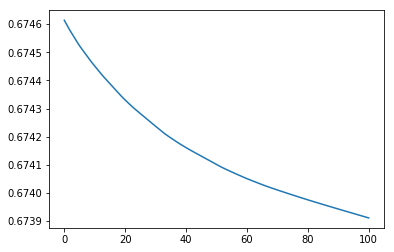

In [114]:
plt.plot(np.linspace(0,100, len(ls)), ls)
plt.show()